In [4]:
pwd

'/home/wsuser/work'

In [5]:
!pip install tensorflow --upgrade

In [6]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

2022-11-18 09:16:18.234201: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 09:16:18.833134: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 09:16:18.833248: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /op

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='o58uAinmdzXtLgQHZVw8WeFds-HPV_FiqQno1ZAFECSp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'vegetablediseaseprediction-donotdelete-pr-tu6rk1bz8j3qu4'
object_key = 'Veg-dataset.zip'

streaming_body_5 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [14]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_5.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [15]:
pwd

'/home/wsuser/work'

In [17]:
import os
filenames=os.listdir('/home/wsuser/work/Veg-dataset/train_set')

In [47]:
x_train = train_datagen.flow_from_directory('/home/wsuser/work/Veg-dataset/train_set',target_size=(64,64),class_mode='categorical',batch_size=100)
x_test = train_datagen.flow_from_directory('/home/wsuser/work/Veg-dataset/test_set',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [48]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [49]:
model = Sequential()

In [50]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [51]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [52]:
model.add(Flatten())

In [53]:
model.add(Dense(300,activation='relu')) # Hidden layer
model.add(Dense(150,activation='relu')) # Hidden layer
model.add(Dense(units = 9,activation='softmax')) 

In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
len(x_train)

114

In [56]:
model.fit(x_train,
          steps_per_epoch=len(x_train),
          epochs=10,
          )

Epoch 1/10
114/114 [==============================] - 67s 583ms/step - loss: 1.4843 - accuracy: 0.5058
Epoch 2/10
114/114 [==============================] - 68s 596ms/step - loss: 0.7186 - accuracy: 0.7486
Epoch 3/10
114/114 [==============================] - 68s 593ms/step - loss: 0.5130 - accuracy: 0.8209
Epoch 4/10
114/114 [==============================] - 67s 583ms/step - loss: 0.4158 - accuracy: 0.8567
Epoch 5/10
114/114 [==============================] - 67s 590ms/step - loss: 0.3733 - accuracy: 0.8705
Epoch 6/10
114/114 [==============================] - 68s 598ms/step - loss: 0.3251 - accuracy: 0.8913
Epoch 7/10
114/114 [==============================] - 67s 590ms/step - loss: 0.2961 - accuracy: 0.8965
Epoch 8/10
114/114 [==============================] - 68s 593ms/step - loss: 0.2462 - accuracy: 0.9190
Epoch 9/10
114/114 [==============================] - 67s 583ms/step - loss: 0.2085 - accuracy: 0.9306
Epoch 10/10
114/114 [==============================] - 67s 586ms/step - l

In [57]:
model.save("vegetables_train.h5")

In [59]:
!tar -zcvf vegetables-model_new.tgz vegetables_train.h5

vegetables_train.h5


In [60]:
ls -1

fruits-model_new.tgz
Veg-dataset/
vegetables-model_new.tgz
vegetables_train.h5


In [61]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 18.6 MB/s eta 0:00:01


In [65]:
from ibm_watson_machine_learning import APIClient
wml_credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"Jl0VgQ40vRcibWK6COsvcy_bqgbFXU3noYZRBiEwgGEb"
}
client = APIClient(wml_credentials)

In [66]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [68]:
space_uid = guid_from_space_name(client,'vegetables_classification')
print("Space UID = " + space_uid)

Space UID = e2cdf658-21a2-4046-983a-aa700a644600


In [69]:
client.set.default_space(space_uid)

'SUCCESS'

In [70]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [71]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [72]:
model_details = client.repository.store_model(model='vegetables-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [73]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T10:09:33.830Z',
  'id': '760e3e39-f0fb-4e79-992b-2e4cdbda0b26',
  'modified_at': '2022-11-18T10:09:37.639Z',
  'name': 'CNN',
  'owner': 'IBMid-6680008O4W',
  'resource_key': 'f33b4f2e-aacc-4ea1-bc58-9c4d1b4d17be',
  'space_id': 'e2cdf658-21a2-4046-983a-aa700a644600'},
 'system': {'warnings': []}}

In [74]:
model_id = client.repository.get_model_id(model_details)
model_id

'760e3e39-f0fb-4e79-992b-2e4cdbda0b26'

In [75]:
client.repository.download(model_id,'vegetables_model_new.tar.gz')

Successfully saved model content to file: 'vegetables_model_new.tar.gz'


'/home/wsuser/work/vegetables_model_new.tar.gz'

In [76]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [77]:
model = load_model("vegetables_train.h5")

In [78]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='o58uAinmdzXtLgQHZVw8WeFds-HPV_FiqQno1ZAFECSp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'vegetablediseaseprediction-donotdelete-pr-tu6rk1bz8j3qu4'
object_key = 'c902f89f-a54d-44fa-8fd4-81fb9f536313___Keller.St_CG 1834.JPG'

streaming_body_6 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [80]:
img = Image.open(streaming_body_6).convert("L") # convert image to monochrome
img = img.resize( (64,64) ) # resizing of input image

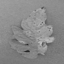

In [81]:
img

In [82]:
x = np.array(img) #converting to image
x=np.ones((64,64,3))

In [83]:
x=np.expand_dims(x,axis=0)

In [84]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 91ms/step


In [86]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [87]:
preds=(index[y[0]])
preds

'Tomato___Late_blight'